Task-I
Predict the percentage of an student based on the no. of study hours.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

In [42]:
data_sheet=pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data_sheet

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [43]:
data_sheet.isnull==True

False

There is no null value in the dataset.

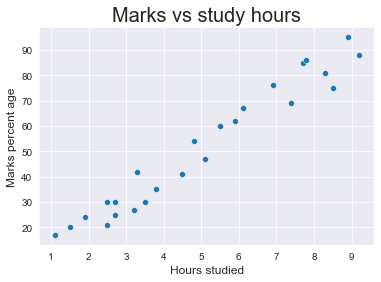

In [44]:
sns.set_style("darkgrid")
sns.scatterplot(y=data_sheet['Scores'],x=data_sheet['Hours'])
plt.title("Marks vs study hours",size=20)
plt.ylabel("Marks percent age",size=12)
plt.xlabel("Hours studied",size=12)
plt.show()

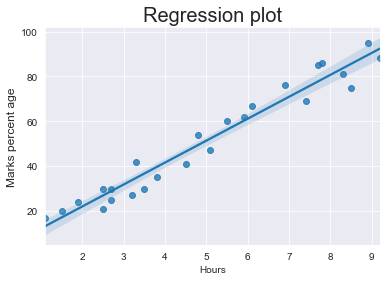

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [45]:
sns.regplot(x=data_sheet['Hours'], y=data_sheet['Scores'])
plt.title("Regression plot",size=20)
plt.ylabel('Marks percent age',size=12)
plt.show()
print(data_sheet.corr())

It confirmed that the variables are positively correlated.

In [46]:
# Splitting the datax
x=data_sheet.iloc[:,:-1].values
y=data_sheet.iloc[:,1].values
train_x,val_x,train_y,val_y=train_test_split(x,y,random_state=0)

In [47]:
regression=LinearRegression()
regression.fit(train_x,train_y)
print("Model trained")

Model trained


In [48]:
#predict the percentage of marks
pred_y=regression.predict(val_x)
prediction=pd.DataFrame({'Hours':[i[0] for i in val_x], 'Predicted marks':[k for k in pred_y]})
prediction

,Hours,Predicted marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [49]:
# comparing in predicted and actual marks
compare_scores=pd.DataFrame({'Actual Marks': val_y,'Predicted marks':pred_y})
compare_scores

,Actual Marks,Predicted marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


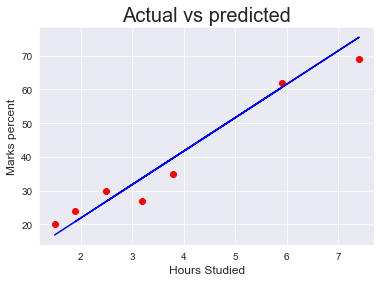

In [50]:
plt.scatter(x=val_x,y=val_y,color='red')
plt.plot(val_x,pred_y,color='blue')
plt.title('Actual vs predicted',size=20)
plt.ylabel('Marks percent',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

In [51]:
#calculate the accuracy of model
print('Mean absolute error:',mean_absolute_error(val_y,pred_y))

Mean absolute error: 4.130879918502486


In [52]:
hours=[9.25]
ans=regression.predict([hours])
print(format(round(ans[0],3)))

93.893
